In [1]:
%matplotlib inline

# Calman Filter
## Question 1
$$x_{k+1} = x_k,\enspace x_0 = x = 0$$
$$y_k = x_k + v_k, \enspace \mathbb{E}\{v_k^2\} = 1$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    'font.family':'Times New Roman',
    'text.usetex': True
})
csfont = {'fontname':'Times New Roman'}
from kf import KF, Luenberger, mean_prior
rng = np.random.default_rng()

In [3]:
kfk1 = KF(x0=[1], P0=[0.16], H=[1], Q=[0], R=[1], PHI=[1], GAMMA=[1], UPSILON=[1])
for i in range(100):
    kfk1.recurring(0 + rng.standard_normal(1))
kfk2 = KF(x0=[1], P0=[1], H=[1], Q=[0], R=[1], PHI=[1], GAMMA=[1], UPSILON=[1])
for i in range(100):
    kfk2.recurring(0 + rng.standard_normal(1))

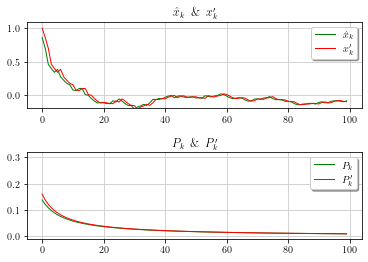

In [4]:
def answer00(kfk):
    fig, (ax1, ax2) = plt.subplots(2, 1)
    fig.subplots_adjust(hspace=0.5)

    ax1.set_title(r"$\hat{x}_k \enspace \& \enspace x^\prime_k$")
    ax1.plot([mean[0] for mean in kfk.x_hat], 'g', linewidth=1, label=r"$\hat{x}_k$")
    ax1.plot([mean[0] for mean in kfk.x_prime], 'r', linewidth=1, label=r"$x^\prime_k$")
    ax1.grid(color='lightgrey', linestyle='-', linewidth=1)
    ax1.set_ylim([-0.2, 1.1])
    leg = ax1.legend(loc='upper right', ncol=1, shadow=True, fancybox=True)

    ax2.set_title(r"$P_k \enspace \& \enspace P^\prime_k$")
    ax2.plot([cov[0] for cov in kfk.P], 'g', linewidth=1, label=r"$P_k$")
    ax2.plot([cov[0] for cov in kfk.P_prime], 'r', linewidth=1, label=r"$P^\prime_k$")
    ax2.grid(color='lightgrey', linestyle='-', linewidth=1)
    ax2.set_ylim([-0.01, 0.32])
    leg = ax2.legend(loc='upper right', ncol=1, shadow=True, fancybox=True)


    fig = plt.gcf()
    fig.savefig('img/answer00.png', dpi=600)
    plt.show()
answer00(kfk1)

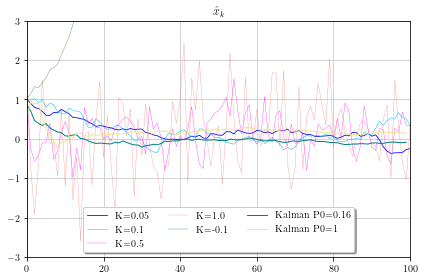

In [5]:
k1 = Luenberger(x0=[1], K=0.01)
for i in range(1000):
    k1.recurring(0 + rng.standard_normal(1))

k2 = Luenberger(x0=[1], K=0.05)
for i in range(1000):
    k2.recurring(0 + rng.standard_normal(1))

k3 = Luenberger(x0=[1], K=0.1)
for i in range(1000):
    k3.recurring(0 + rng.standard_normal(1))

k4 = Luenberger(x0=[1], K=0.5)
for i in range(1000):
    k4.recurring(0+ rng.standard_normal(1))

k5= Luenberger(x0=[1], K=1)
for i in range(1000):
    k5.recurring(0 + rng.standard_normal(1))

k6= Luenberger(x0=[1], K=-0.1)
for i in range(1000):
    k6.recurring(0 + rng.standard_normal(1))

plt.figure(3)
plt.title(r"$\hat{x}_k$")
# plt.plot([mean[0] for mean in k1.x_hat], 'm', linewidth=1, label=f"K={0.01}")
plt.plot([mean[0] for mean in k2.x_hat], 'b', linewidth=0.8, label=f"K={0.05}")
plt.plot([mean[0] for mean in k3.x_hat], 'deepskyblue', linewidth=0.5, label=f"K={0.1}")
plt.plot([mean[0] for mean in k4.x_hat], 'fuchsia', linewidth=0.3, label=f"K={0.5}")
plt.plot([mean[0] for mean in k5.x_hat], 'lightcoral', linewidth=0.3, label=f"K={1.0}")
plt.plot([mean[0] for mean in k6.x_hat], 'g', linewidth=0.3, label=f"K={-0.1}")
plt.plot([mean[0] for mean in kfk1.x_hat], 'teal', linewidth=1, label='Kalman P0=0.16')
plt.plot([mean[0] for mean in kfk2.x_hat], 'khaki', linewidth=1, label='Kalman P0=1')

leg = plt.legend(loc='lower center', ncol=3, shadow=True, fancybox=True)
plt.grid(color='lightgrey', linestyle='-', linewidth=1)
plt.axis([0, 100, -3, 3])

fig = plt.gcf()
plt.tight_layout()
fig.savefig('img/answer02.png', dpi=600)
plt.show()

In [6]:
from IPython.display import display, Latex
for i in range(3):
    display(Latex(f'$x_{i}$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

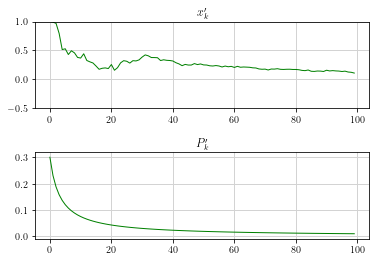

In [7]:
kf = KF(x0=[1], P0=[0.3], H=[1], Q=[0], R=[1], PHI=[1], GAMMA=[1], UPSILON=[1])
mean_prior(kf,[0],times=100)
def answer01():
    fig, (ax1, ax2) = plt.subplots(2, 1)
    fig.subplots_adjust(hspace=0.5)

    ax1.set_title(r"$x^\prime_k$")
    ax1.plot([mean[0] for mean in kf.x_prime], 'g', linewidth=1, label=r"$x^\prime_k$")
    ax1.grid(color='lightgrey', linestyle='-', linewidth=1)
    ax1.set_ylim([-0.5, 1])

    ax2.set_title(r"$P^\prime_k$")
    ax2.plot([cov[0] for cov in kf.P_prime], 'g', linewidth=1, label=r"$P^\prime_k$")
    ax2.grid(color='lightgrey', linestyle='-', linewidth=1)
    ax2.set_ylim([-0.01, 0.32])

    fig = plt.gcf()
    fig.savefig('img/answer01.png', dpi=600)
    plt.show()
answer01()